In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open('results.pickle', "rb") as handle:
    results = pickle.load(handle)

In [3]:
results.keys()

dict_keys(['decision_tree_regressor', 'random_forest_regressor'])

In [9]:
experimentos = ['1_day', '7_days', '14_days', '28_days']
for key, _ in results.items():
    print(key)

decision_tree_regressor
random_forest_regressor


In [23]:
len(results['decision_tree_regressor']['with_features']['1_day'])

3

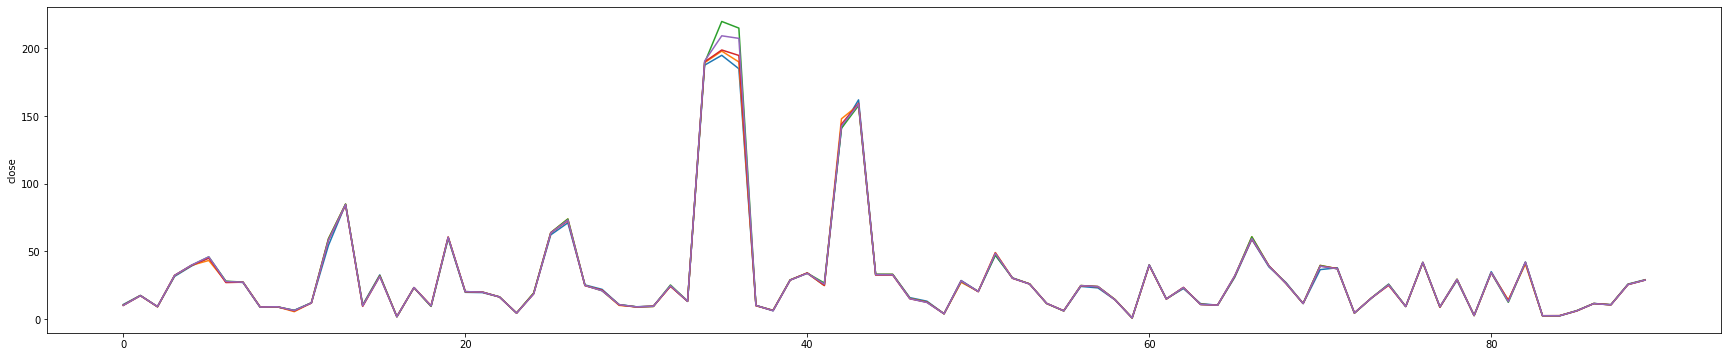

In [25]:
fig, ax = plt.subplots(figsize=(30, 6))
x = [_ for _ in range(len(results['decision_tree_regressor']['with_features']['1_day']['y_test']))]

results['decision_tree_regressor']['with_features']['1_day']
results['decision_tree_regressor']['wo_features']['1_day']
results['random_forest_regressor']['with_features']['1_day']
results['random_forest_regressor']['wo_features']['1_day']

sns.lineplot(x=x, y=results['decision_tree_regressor']['with_features']['1_day']['y_test'])
ax.plot(results['decision_tree_regressor']['with_features']['1_day']['predicted'])
ax.plot(results['decision_tree_regressor']['wo_features']['1_day']['predicted'])
ax.plot(results['random_forest_regressor']['with_features']['1_day']['predicted'])
ax.plot(results['random_forest_regressor']['wo_features']['1_day']['predicted'])


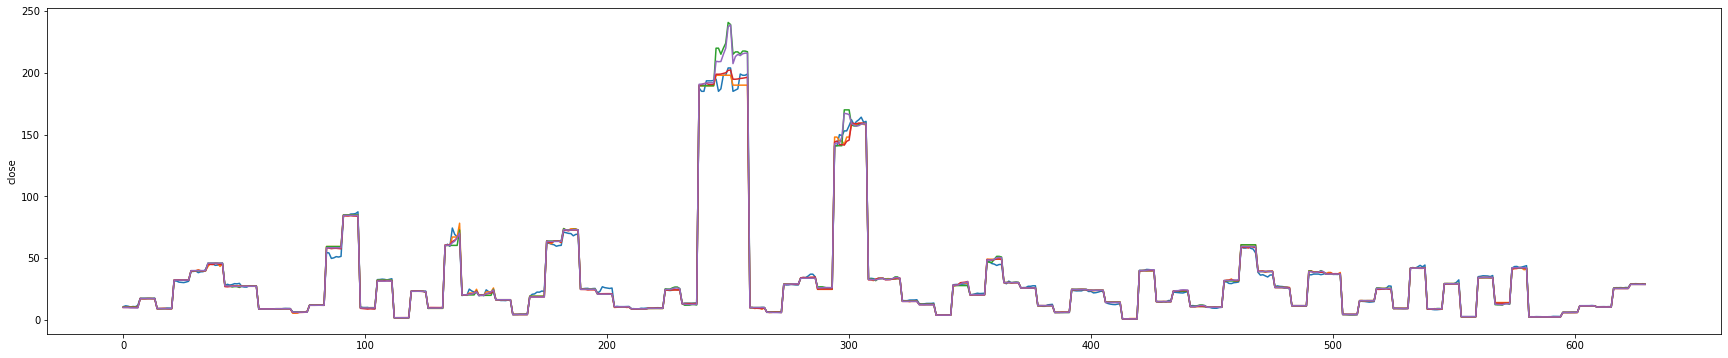

In [26]:
fig, ax = plt.subplots(figsize=(30, 6))
x = [_ for _ in range(len(results['decision_tree_regressor']['with_features']['7_days']['y_test']))]

results['decision_tree_regressor']['with_features']['7_days']
results['decision_tree_regressor']['wo_features']['7_days']
results['random_forest_regressor']['with_features']['7_days']
results['random_forest_regressor']['wo_features']['7_days']

sns.lineplot(x=x, y=results['decision_tree_regressor']['with_features']['7_days']['y_test'])
ax.plot(results['decision_tree_regressor']['with_features']['7_days']['predicted'])
ax.plot(results['decision_tree_regressor']['wo_features']['7_days']['predicted'])
ax.plot(results['random_forest_regressor']['with_features']['7_days']['predicted'])
ax.plot(results['random_forest_regressor']['wo_features']['7_days']['predicted'])

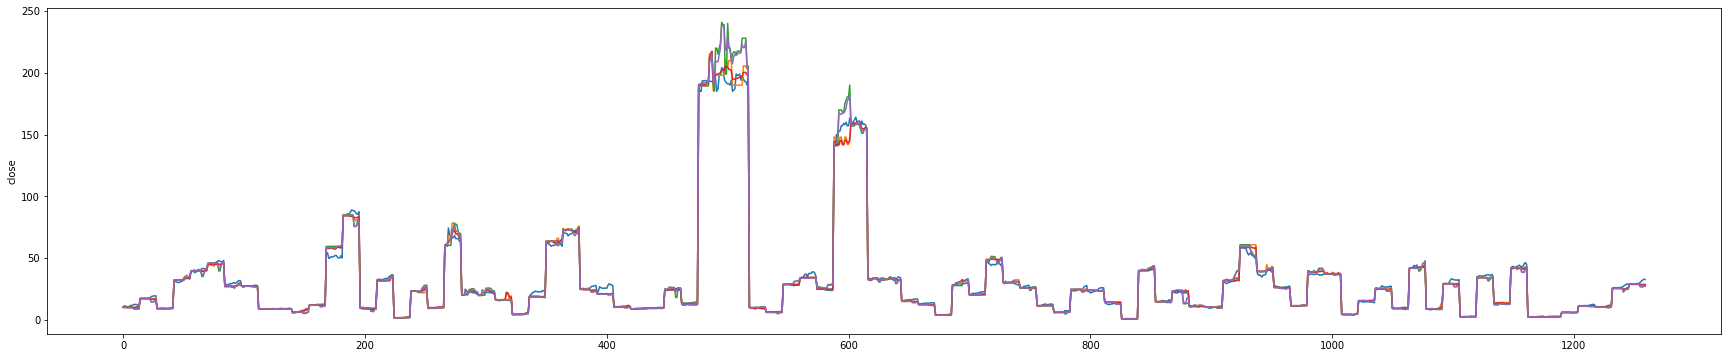

In [27]:
fig, ax = plt.subplots(figsize=(30, 6))
x = [_ for _ in range(len(results['decision_tree_regressor']['with_features']['14_days']['y_test']))]

results['decision_tree_regressor']['with_features']['14_days']
results['decision_tree_regressor']['wo_features']['14_days']
results['random_forest_regressor']['with_features']['14_days']
results['random_forest_regressor']['wo_features']['14_days']

sns.lineplot(x=x, y=results['decision_tree_regressor']['with_features']['14_days']['y_test'])
ax.plot(results['decision_tree_regressor']['with_features']['14_days']['predicted'])
ax.plot(results['decision_tree_regressor']['wo_features']['14_days']['predicted'])
ax.plot(results['random_forest_regressor']['with_features']['14_days']['predicted'])
ax.plot(results['random_forest_regressor']['wo_features']['14_days']['predicted'])

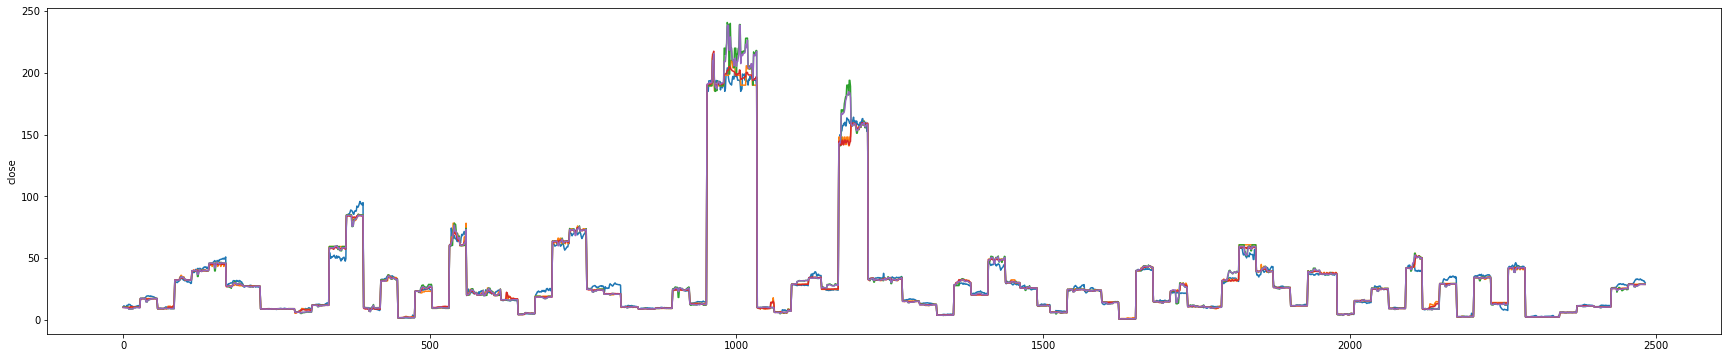

In [28]:
fig, ax = plt.subplots(figsize=(30, 6))
x = [_ for _ in range(len(results['decision_tree_regressor']['with_features']['28_days']['y_test']))]

results['decision_tree_regressor']['with_features']['28_days']
results['decision_tree_regressor']['wo_features']['28_days']
results['random_forest_regressor']['with_features']['28_days']
results['random_forest_regressor']['wo_features']['28_days']

sns.lineplot(x=x, y=results['decision_tree_regressor']['with_features']['28_days']['y_test'])
ax.plot(results['decision_tree_regressor']['with_features']['28_days']['predicted'])
ax.plot(results['decision_tree_regressor']['wo_features']['28_days']['predicted'])
ax.plot(results['random_forest_regressor']['with_features']['28_days']['predicted'])
ax.plot(results['random_forest_regressor']['wo_features']['28_days']['predicted'])